        # Updated Excel

In [1]:
# import the relevant packages
from scipy.interpolate import *
from scipy import stats
from scipy.stats.mstats import winsorize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
# Set matplotlib inline
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


C:\Users\Sze Siang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Sze Siang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv('Set A.csv',encoding = "ISO-8859-1",index_col= [0,1])
print(df.head(3))

                                    cusip Ticker  Environment   Social   \
Company                    Year                                           
Agilent Technologies, Inc. 2000  00846U10      A             0        1   
                           2001  00846U10      A             0        1   
                           2002  00846U10      A             0        7   

                                 Governance   SumofESG   New SUMofESG  \
Company                    Year                                         
Agilent Technologies, Inc. 2000           -2          5            -1   
                           2001           -2         -4            -1   
                           2002            0          0             7   

                                      P/B       ROA  Leverage      SG&A  \
Company                    Year                                           
Agilent Technologies, Inc. 2000  3.993307  0.197281  0.375074  0.770022   
                           2001  

In [3]:
df.describe()

,Environment,Social,Governance,SumofESG,New SUMofESG,P/B,ROA,Leverage,SG&A,ROE,R&D,CAPEX,Intangible,Revenue,SIC Dummy
count,25262.000000,25262.000000,25262.000000,25262.00000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000
mean,0.116499,0.275948,-0.334692,-0.02668,0.057755,3.361883,0.082374,0.817012,0.149319,0.249743,0.019265,0.046465,0.177892,0.866566,34.115470
std,0.946244,2.060171,0.784968,2.47678,2.692733,42.779266,0.089468,0.499557,0.183769,2.631197,0.047746,0.079022,0.266501,0.862108,20.845058
min,-5.000000,-9.000000,-5.000000,-12.00000,-12.000000,0.000000,-0.762097,0.000000,-0.042283,-265.494845,0.000000,-0.029157,0.000000,-0.227219,10.000000
25%,0.000000,-1.000000,-1.000000,-1.00000,-1.000000,1.008921,0.020207,0.486426,0.007433,0.084628,0.000000,0.003463,0.007495,0.257756,13.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,1.787980,0.069186,0.651254,0.083990,0.171030,0.000000,0.027363,0.068914,0.665520,34.000000
75%,0.000000,1.000000,0.000000,1.00000,1.000000,2.979255,0.125211,0.966112,0.230884,0.283129,0.015105,0.060195,0.270880,1.182436,49.000000
max,6.000000,15.000000,2.000000,20.00000,20.000000,5603.074227,1.216186,2.869038,1.917843,233.176471,1.792264,5.598592,9.914449,13.490562,99.000000


In [4]:
df.columns = df.columns.str.strip() #removewhitespaces

In [5]:
df_win = df.copy()

In [6]:
df_win["Environment"] = winsorize(df_win["Environment"], (0.01, 0.01))
df_win["Social"] = winsorize(df_win["Social"], (0.01, 0.01))
df_win["Governance"] = winsorize(df_win["Governance"], (0.01, 0.01))
df_win["SumofESG"] = winsorize(df_win["SumofESG"], (0.01, 0.01))
df_win["P/B"] = winsorize(df_win["P/B"], (0.01, 0.01))
df_win["ROA"] = winsorize(df_win["ROA"], (0.01, 0.01))
df_win["Leverage"] = winsorize(df_win["Leverage"], (0.01, 0.01))
df_win["SG&A"] = winsorize(df_win["SG&A"], (0.01, 0.01))
df_win["ROE"] = winsorize(df_win["ROE"], (0.01, 0.01))
df_win["R&D"] = winsorize(df_win["R&D"], (0.01, 0.01))
df_win["CAPEX"] = winsorize(df_win["CAPEX"], (0.01, 0.01))
df_win["Intangible"] = winsorize(df_win["Intangible"], (0.01, 0.01))
df_win["Revenue"] = winsorize(df_win["Revenue"], (0.01, 0.01))

In [7]:
df_win.describe()

,Environment,Social,Governance,SumofESG,New SUMofESG,P/B,ROA,Leverage,SG&A,ROE,R&D,CAPEX,Intangible,Revenue,SIC Dummy
count,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000
mean,0.117607,0.268902,-0.333782,-0.032974,0.057755,2.521612,0.082477,0.816977,0.147582,0.218083,0.018385,0.044439,0.171644,0.855235,34.115470
std,0.915615,1.981750,0.770368,2.371411,2.692733,3.050541,0.081237,0.497580,0.176065,0.267501,0.040559,0.056832,0.218855,0.794958,20.845058
min,-3.000000,-4.000000,-3.000000,-6.000000,-12.000000,0.000000,-0.122516,0.119374,0.000000,-0.405706,0.000000,0.000000,0.000000,0.038857,10.000000
25%,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.008921,0.020207,0.486426,0.007433,0.084628,0.000000,0.003463,0.007495,0.257756,13.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.787980,0.069186,0.651254,0.083990,0.171030,0.000000,0.027363,0.068914,0.665520,34.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,2.979255,0.125211,0.966112,0.230884,0.283129,0.015105,0.060195,0.270880,1.182436,49.000000
max,4.000000,7.000000,1.000000,8.000000,20.000000,20.814432,0.352390,1.881904,0.768778,1.784969,0.212959,0.321436,0.984274,4.056562,99.000000


In [8]:
df_win.tail()

cusip Ticker  Environment  Social  Governance  \
Company           Year                                                     
Zoran Corporation 2010  98975F10   ZRAN            0      -2           0   
ZOETIS INC.       2013  98978V10    ZTS            0      -1           0   
                  2014  98978V10    ZTS            1       1           1   
                  2015  98978V10    ZTS            2       0           1   
                  2016  98978V10    ZTS            1       1           0   

                        SumofESG  New SUMofESG        P/B       ROA  Leverage  \
Company           Year                                                          
Zoran Corporation 2010         0            -2   1.073308 -0.057724  0.208737   
ZOETIS INC.       2013        -4            -1  16.990644  0.180613  0.853309   
                  2014        -3             3  16.134737  0.177493  0.797639   
                  2015        -3             3  20.814432  0.195702  0.862126   
                  2016         2             2  17.600086  0.187539  0.804027   

                            SG&A       ROE       R&D     CAPEX  Intangible  \
Company           Year                                                       
Zoran Corporation 2010  0.393153 -0.079432  0.209423  0.011938    0.097429   
ZOETIS INC.       2013  0.289843  1.175676  0.063718  0.029384    0.285053   
                  2014  0.290942  0.870606  0.061299  0.027447    0.259683   
                  2015  0.266535  1.185151  0.055396  0.033903    0.400333   
                  2016  0.215215  0.989993  0.047517  0.027297    0.342348   

                         Revenue  SIC Dummy  
Company           Year                       
Zoran Corporation 2010  0.646824         36  
ZOETIS INC.       2013  0.732034         28  
                  2014  0.734523         28  
                  2015  0.724837         28  
                  2016  0.621509         28

In [9]:
df_win["newSumofESG"] = df_win["Environment"] + df_win["Social"] + df_win["Governance"]
df_win.drop(columns=["SumofESG","New SUMofESG"])
df_win.head()

cusip Ticker  Environment  Social  \
Company                    Year                                         
Agilent Technologies, Inc. 2000  00846U10      A            0       1   
                           2001  00846U10      A            0       1   
                           2002  00846U10      A            0       7   
                           2003  00846U10      A            0       2   
                           2004  00846U10      A            0       3   

                                 Governance  SumofESG  New SUMofESG       P/B  \
Company                    Year                                                 
Agilent Technologies, Inc. 2000          -2         5            -1  3.993307   
                           2001          -2        -4            -1  1.814184   
                           2002           0         0             7  1.387778   
                           2003          -1        -2             1  4.200397   
                           2004          -1        -1             2  3.392889   

                                      ROA  Leverage      SG&A       ROE  \
Company                    Year                                           
Agilent Technologies, Inc. 2000  0.197281  0.375074  0.768778  0.203989   
                           2001 -0.065282  0.291385  0.458042 -0.097190   
                           2002 -0.122516  0.435938  0.458177 -0.244867   
                           2003 -0.043033  0.551532  0.336218 -0.125000   
                           2004  0.090043  0.490221  0.417659  0.157631   

                                      R&D     CAPEX  Intangible   Revenue  \
Company                    Year                                             
Agilent Technologies, Inc. 2000  0.212959  0.151359    0.102314  1.978876   
                           2001  0.160119  0.104570    0.127003  0.996558   
                           2002  0.146381  0.037691    0.085775  0.752567   
                           2003  0.128124  0.024991    0.049006  0.738266   
                           2004  0.145625  0.018739    0.070351  1.140384   

                                 SIC Dummy  newSumofESG  
Company                    Year                          
Agilent Technologies, Inc. 2000         38           -1  
                           2001         38           -1  
                           2002         38            7  
                           2003         38            1  
                           2004         38            2

In [10]:
from linearmodels import PooledOLS
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.api as sm

In [11]:
df_win['P/B'].dropna()
df_win['SumofESG'].dropna()

Company                     Year
Agilent Technologies, Inc.  2000    5
                            2001   -4
                            2002    0
                            2003   -2
                            2004   -1
                                   ..
Zoran Corporation           2010    0
ZOETIS INC.                 2013   -4
                            2014   -3
                            2015   -3
                            2016    2
Name: SumofESG, Length: 25262, dtype: int64

In [12]:
df_win_new = df_win.drop(['SumofESG','New SUMofESG'], axis=1)

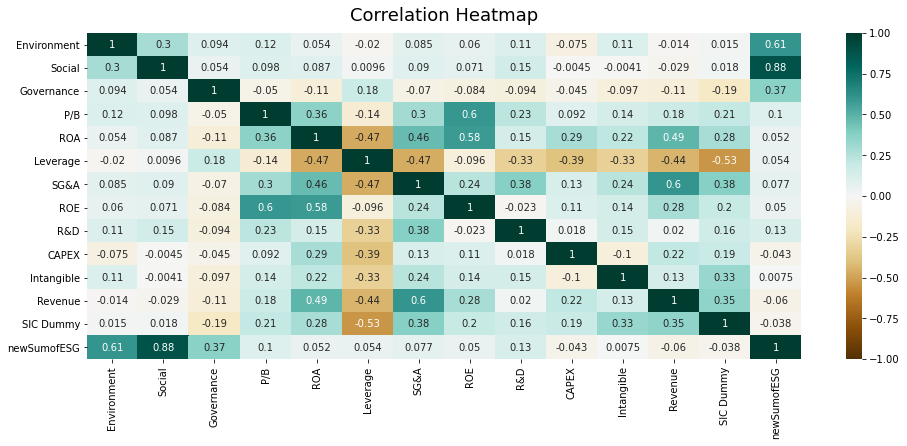

In [13]:
##correlation heatmap

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_win_new.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [14]:
df_win_new.corr().head(12)

,Environment,Social,Governance,P/B,ROA,Leverage,SG&A,ROE,R&D,CAPEX,Intangible,Revenue,SIC Dummy,newSumofESG
Environment,1.000000,0.295225,0.093875,0.115793,0.053999,-0.019902,0.084635,0.059656,0.105923,-0.075240,0.111436,-0.014188,0.015039,0.606407
Social,0.295225,1.000000,0.054255,0.097601,0.086594,0.009629,0.089580,0.071083,0.153903,-0.004519,-0.004077,-0.028611,0.018353,0.884308
Governance,0.093875,0.054255,1.000000,-0.049537,-0.113426,0.180337,-0.070118,-0.084401,-0.093731,-0.044971,-0.096811,-0.110918,-0.194294,0.371571
P/B,0.115793,0.097601,-0.049537,1.000000,0.360762,-0.137388,0.297278,0.597136,0.233797,0.092294,0.143933,0.178700,0.207789,0.100726
ROA,0.053999,0.086594,-0.113426,0.360762,1.000000,-0.468994,0.464887,0.579606,0.146336,0.285371,0.219236,0.486807,0.282725,0.051532
Leverage,-0.019902,0.009629,0.180337,-0.137388,-0.468994,1.000000,-0.465400,-0.096055,-0.325150,-0.391939,-0.325177,-0.442022,-0.532659,0.053889
SG&A,0.084635,0.089580,-0.070118,0.297278,0.464887,-0.465400,1.000000,0.238277,0.377362,0.130691,0.237960,0.601665,0.380670,0.077489
ROE,0.059656,0.071083,-0.084401,0.597136,0.579606,-0.096055,0.238277,1.000000,-0.023036,0.114500,0.141149,0.283543,0.199804,0.050298
R&D,0.105923,0.153903,-0.093731,0.233797,0.146336,-0.325150,0.377362,-0.023036,1.000000,0.017774,0.145121,0.019786,0.158821,0.127132
CAPEX,-0.075240,-0.004519,-0.044971,0.092294,0.285371,-0.391939,0.130691,0.114500,0.017774,1.000000,-0.100489,0.218258,0.194458,-0.043367


In [15]:
#Convert SIC Dummy column to dummy variables

df_win_dummy = pd.get_dummies(prefix='SIC', data=df_win['SIC Dummy'])
df_win_dummy

SIC_10  SIC_12  SIC_13  SIC_14  SIC_15  \
Company                    Year                                           
Agilent Technologies, Inc. 2000       0       0       0       0       0   
                           2001       0       0       0       0       0   
                           2002       0       0       0       0       0   
                           2003       0       0       0       0       0   
                           2004       0       0       0       0       0   
...                                 ...     ...     ...     ...     ...   
Zoran Corporation          2010       0       0       0       0       0   
ZOETIS INC.                2013       0       0       0       0       0   
                           2014       0       0       0       0       0   
                           2015       0       0       0       0       0   
                           2016       0       0       0       0       0   

                                 SIC_16  SIC_17  SIC_20  SIC_21  SIC_22  ...  \
Company                    Year                                          ...   
Agilent Technologies, Inc. 2000       0       0       0       0       0  ...   
                           2001       0       0       0       0       0  ...   
                           2002       0       0       0       0       0  ...   
                           2003       0       0       0       0       0  ...   
                           2004       0       0       0       0       0  ...   
...                                 ...     ...     ...     ...     ...  ...   
Zoran Corporation          2010       0       0       0       0       0  ...   
ZOETIS INC.                2013       0       0       0       0       0  ...   
                           2014       0       0       0       0       0  ...   
                           2015       0       0       0       0       0  ...   
                           2016       0       0       0       0       0  ...   

                                 SIC_73  SIC_75  SIC_78  SIC_79  SIC_80  \
Company                    Year                                           
Agilent Technologies, Inc. 2000       0       0       0       0       0   
                           2001       0       0       0       0       0   
                           2002       0       0       0       0       0   
                           2003       0       0       0       0       0   
                           2004       0       0       0       0       0   
...                                 ...     ...     ...     ...     ...   
Zoran Corporation          2010       0       0       0       0       0   
ZOETIS INC.                2013       0       0       0       0       0   
                           2014       0       0       0       0       0   
                           2015       0       0       0       0       0   
                           2016       0       0       0       0       0   

                                 SIC_82  SIC_83  SIC_87  SIC_88  SIC_99  
Company                    Year                                          
Agilent Technologies, Inc. 2000       0       0       0       0       0  
                           2001       0       0       0       0       0  
                           2002       0       0       0       0       0  
                           2003       0       0       0       0       0  
                           2004       0       0       0       0       0  
...                                 ...     ...     ...     ...     ...  
Zoran Corporation          2010       0       0       0       0       0  
ZOETIS INC.                2013       0       0       0       0       0  
                           2014       0       0       0       0       0  
                           2015       0       0       0       0       0  
                           2016       0       0       0       0       0  

[25262 rows x 59 columns]

In [16]:
df_win_dummy = df_win_dummy.astype(float)

In [17]:
#joining SIC dummy variables to existing dataframe 

new_df = pd.concat([df_win_new, df_win_dummy], axis=1)
new_df

cusip Ticker  Environment  Social  \
Company                    Year                                         
Agilent Technologies, Inc. 2000  00846U10      A            0       1   
                           2001  00846U10      A            0       1   
                           2002  00846U10      A            0       7   
                           2003  00846U10      A            0       2   
                           2004  00846U10      A            0       3   
...                                   ...    ...          ...     ...   
Zoran Corporation          2010  98975F10   ZRAN            0      -2   
ZOETIS INC.                2013  98978V10    ZTS            0      -1   
                           2014  98978V10    ZTS            1       1   
                           2015  98978V10    ZTS            2       0   
                           2016  98978V10    ZTS            1       1   

                                 Governance        P/B       ROA  Leverage  \
Company                    Year                                              
Agilent Technologies, Inc. 2000          -2   3.993307  0.197281  0.375074   
                           2001          -2   1.814184 -0.065282  0.291385   
                           2002           0   1.387778 -0.122516  0.435938   
                           2003          -1   4.200397 -0.043033  0.551532   
                           2004          -1   3.392889  0.090043  0.490221   
...                                     ...        ...       ...       ...   
Zoran Corporation          2010           0   1.073308 -0.057724  0.208737   
ZOETIS INC.                2013           0  16.990644  0.180613  0.853309   
                           2014           1  16.134737  0.177493  0.797639   
                           2015           1  20.814432  0.195702  0.862126   
                           2016           0  17.600086  0.187539  0.804027   

                                     SG&A       ROE  ...  SIC_73  SIC_75  \
Company                    Year                      ...                   
Agilent Technologies, Inc. 2000  0.768778  0.203989  ...     0.0     0.0   
                           2001  0.458042 -0.097190  ...     0.0     0.0   
                           2002  0.458177 -0.244867  ...     0.0     0.0   
                           2003  0.336218 -0.125000  ...     0.0     0.0   
                           2004  0.417659  0.157631  ...     0.0     0.0   
...                                   ...       ...  ...     ...     ...   
Zoran Corporation          2010  0.393153 -0.079432  ...     0.0     0.0   
ZOETIS INC.                2013  0.289843  1.175676  ...     0.0     0.0   
                           2014  0.290942  0.870606  ...     0.0     0.0   
                           2015  0.266535  1.185151  ...     0.0     0.0   
                           2016  0.215215  0.989993  ...     0.0     0.0   

                                 SIC_78  SIC_79  SIC_80  SIC_82  SIC_83  \
Company                    Year                                           
Agilent Technologies, Inc. 2000     0.0     0.0     0.0     0.0     0.0   
                           2001     0.0     0.0     0.0     0.0     0.0   
                           2002     0.0     0.0     0.0     0.0     0.0   
                           2003     0.0     0.0     0.0     0.0     0.0   
                           2004     0.0     0.0     0.0     0.0     0.0   
...                                 ...     ...     ...     ...     ...   
Zoran Corporation          2010     0.0     0.0     0.0     0.0     0.0   
ZOETIS INC.                2013     0.0     0.0     0.0     0.0     0.0   
                           2014     0.0     0.0     0.0     0.0     0.0   
                           2015     0.0     0.0     0.0     0.0     0.0   
                           2016     0.0     0.0     0.0     0.0     0.0   

                                 SIC_87  SIC_88  SIC_99  
Company                    Year                 

In [18]:
##winsorized data 

new_df.describe()

,Environment,Social,Governance,P/B,ROA,Leverage,SG&A,ROE,R&D,CAPEX,...,SIC_73,SIC_75,SIC_78,SIC_79,SIC_80,SIC_82,SIC_83,SIC_87,SIC_88,SIC_99
count,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,...,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000
mean,0.117607,0.268902,-0.333782,2.521612,0.082477,0.816977,0.147582,0.218083,0.018385,0.044439,...,0.069036,0.002811,0.002811,0.007046,0.011480,0.001148,0.000792,0.009936,0.000079,0.003088
std,0.915615,1.981750,0.770368,3.050541,0.081237,0.497580,0.176065,0.267501,0.040559,0.056832,...,0.253521,0.052941,0.052941,0.083647,0.106529,0.033863,0.028127,0.099184,0.008898,0.055482
min,-3.000000,-4.000000,-3.000000,0.000000,-0.122516,0.119374,0.000000,-0.405706,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-1.000000,-1.000000,1.008921,0.020207,0.486426,0.007433,0.084628,0.000000,0.003463,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.787980,0.069186,0.651254,0.083990,0.171030,0.000000,0.027363,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,2.979255,0.125211,0.966112,0.230884,0.283129,0.015105,0.060195,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,7.000000,1.000000,20.814432,0.352390,1.881904,0.768778,1.784969,0.212959,0.321436,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
new_df.columns.tolist()

['cusip',
 'Ticker',
 'Environment',
 'Social',
 'Governance',
 'P/B',
 'ROA',
 'Leverage',
 'SG&A',
 'ROE',
 'R&D',
 'CAPEX',
 'Intangible',
 'Revenue',
 'SIC Dummy',
 'newSumofESG',
 'SIC_10',
 'SIC_12',
 'SIC_13',
 'SIC_14',
 'SIC_15',
 'SIC_16',
 'SIC_17',
 'SIC_20',
 'SIC_21',
 'SIC_22',
 'SIC_23',
 'SIC_24',
 'SIC_25',
 'SIC_26',
 'SIC_27',
 'SIC_28',
 'SIC_29',
 'SIC_30',
 'SIC_31',
 'SIC_32',
 'SIC_33',
 'SIC_34',
 'SIC_35',
 'SIC_36',
 'SIC_37',
 'SIC_38',
 'SIC_39',
 'SIC_40',
 'SIC_41',
 'SIC_42',
 'SIC_44',
 'SIC_45',
 'SIC_46',
 'SIC_47',
 'SIC_48',
 'SIC_49',
 'SIC_50',
 'SIC_51',
 'SIC_52',
 'SIC_53',
 'SIC_54',
 'SIC_55',
 'SIC_56',
 'SIC_57',
 'SIC_58',
 'SIC_59',
 'SIC_70',
 'SIC_71',
 'SIC_72',
 'SIC_73',
 'SIC_75',
 'SIC_78',
 'SIC_79',
 'SIC_80',
 'SIC_82',
 'SIC_83',
 'SIC_87',
 'SIC_88',
 'SIC_99']

In [20]:
## regression done on all variables as per normal

exog_vars = ['Environment','Social','Governance','Revenue','SG&A','ROA','ROE','R&D','CAPEX','Leverage','Intangible']
exog = sm.add_constant(new_df[exog_vars])
endog = new_df['P/B']
#random effects model
model_re = RandomEffects(endog, exog, check_rank=False) 
re_res = model_re.fit() 
#print results
print(re_res)

C:\Users\Sze Siang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.3232
Estimator:              RandomEffects   R-squared (Between):              0.4961
No. Observations:               25262   R-squared (Within):               0.2088
Date:                Tue, Aug 02 2022   R-squared (Overall):              0.4226
Time:                        20:57:39   Log-likelihood                -4.963e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1096.1
Entities:                        5583   P-value                           0.0000
Avg Obs:                       4.5248   Distribution:                F(11,25250)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             985.56
                            

In [21]:
## regression inclusive for all SIC dummy variables

exog_vars = ['Environment','Social','Governance','Revenue','SG&A','ROA','ROE','R&D','CAPEX','Leverage','Intangible',
             'SIC_10','SIC_12','SIC_13','SIC_14','SIC_15','SIC_16','SIC_17','SIC_20','SIC_21','SIC_22','SIC_23','SIC_24',
             'SIC_25','SIC_26','SIC_27','SIC_28','SIC_29','SIC_30','SIC_31','SIC_32','SIC_33','SIC_34','SIC_35','SIC_36',
             'SIC_37','SIC_38','SIC_39','SIC_40','SIC_41','SIC_42','SIC_44','SIC_45', 'SIC_46','SIC_47','SIC_48','SIC_49',
             'SIC_50','SIC_51','SIC_52','SIC_53','SIC_54','SIC_55','SIC_56','SIC_57','SIC_58','SIC_59','SIC_70','SIC_71',
             'SIC_72','SIC_73','SIC_75','SIC_78','SIC_79','SIC_80','SIC_82','SIC_83','SIC_87','SIC_88','SIC_99']
exog = sm.add_constant(new_df[exog_vars])
endog = new_df['P/B']
#random effects model
model_re = RandomEffects(endog, exog, check_rank=False) 
re_res = model_re.fit() 
#print results
print(re_res)

C:\Users\Sze Siang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.3385
Estimator:              RandomEffects   R-squared (Between):              0.5207
No. Observations:               25262   R-squared (Within):               0.2154
Date:                Tue, Aug 02 2022   R-squared (Overall):              0.4359
Time:                        20:57:40   Log-likelihood                -4.954e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      184.12
Entities:                        5583   P-value                           0.0000
Avg Obs:                       4.5248   Distribution:                F(70,25191)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             166.07
                            

C:\Users\Sze Siang\anaconda3\lib\site-packages\linearmodels\panel\results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")
C:\Users\Sze Siang\anaconda3\lib\site-packages\linearmodels\panel\results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")
C:\Users\Sze Siang\anaconda3\lib\site-packages\linearmodels\panel\results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")
C:\Users\Sze Siang\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1847: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
C:\Users\Sze Siang\anaconda3\lib\site-packages\linearmodels\panel\results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._

In [22]:
#removing ROA & CAPEX

exog_vars = ['Environment','Social','Revenue','Governance','SG&A','ROE','R&D','Leverage','Intangible']
exog = sm.add_constant(new_df[exog_vars])
endog = new_df['P/B']
#random effects model
model_re = RandomEffects(endog, exog, check_rank=False) 
re_res = model_re.fit() 
#print results
print(re_res)

C:\Users\Sze Siang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.3162
Estimator:              RandomEffects   R-squared (Between):              0.4852
No. Observations:               25262   R-squared (Within):               0.2050
Date:                Tue, Aug 02 2022   R-squared (Overall):              0.4185
Time:                        20:57:40   Log-likelihood                -4.967e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1297.7
Entities:                        5583   P-value                           0.0000
Avg Obs:                       4.5248   Distribution:                 F(9,25252)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             1165.0
                            

In [23]:
#including only ESG

exog_vars = ['Environment','Social','Governance']
exog = sm.add_constant(new_df[exog_vars])
endog = new_df['P/B']
#random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
#print results
print(re_res)

C:\Users\Sze Siang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.0289
Estimator:              RandomEffects   R-squared (Between):              0.0099
No. Observations:               25262   R-squared (Within):               0.0003
Date:                Tue, Aug 02 2022   R-squared (Overall):              0.0112
Time:                        20:57:41   Log-likelihood                 -5.26e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      250.24
Entities:                        5583   P-value                           0.0000
Avg Obs:                       4.5248   Distribution:                 F(3,25258)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             22.384
                            

In [24]:
#replacing individual esg components with new sumofesg

exog_vars = ['newSumofESG','SG&A','ROE','R&D','Leverage','Intangible','SIC Dummy']
exog = sm.add_constant(new_df[exog_vars])
endog = new_df['P/B']
#random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
#print results
print(re_res)

C:\Users\Sze Siang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.3168
Estimator:              RandomEffects   R-squared (Between):              0.4866
No. Observations:               25262   R-squared (Within):               0.2054
Date:                Tue, Aug 02 2022   R-squared (Overall):              0.4191
Time:                        20:57:41   Log-likelihood                -4.966e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1673.1
Entities:                        5583   P-value                           0.0000
Avg Obs:                       4.5248   Distribution:                 F(7,25254)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             1502.3
                            